<h1><b>Self-Organizing Maps (SOM)</b></h1>

Στην άσκηση αυτή θα μελετήσετε μία εφαρμογή των <i>Self-Organizing Maps</i> \(<i>SOM</i>) για τη συμπίεση εικόνων. Ως είσοδο θα χρησιμοποιήσετε τη φωτογραφία του διάσημου τενίστα <i>Rafael Nadal</i> (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal.jpg">nadal.jpg</a>). Η άσκηση αυτή βασίστηκε στον κώδικα που παρέχεται <a href=https://github.com/JustGlowing/minisom/blob/master/examples/ColorQuantization.ipynb>εδώ</a>.

<h3><b>Κώδικας</b></h3>

In [ ]:
!pip install minisom
!pip install numpy
!pip install matplotlib

Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 

/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 0.021426949807347544
quantization...


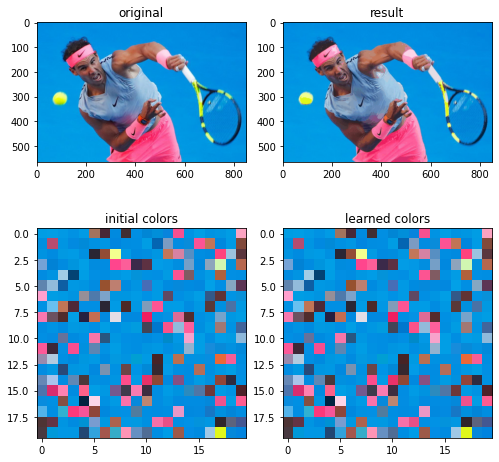

quantization...


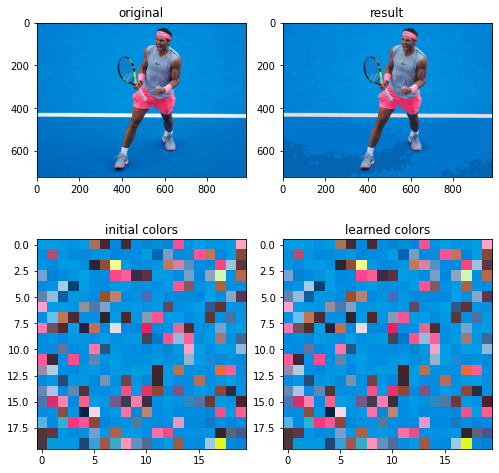

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# read the image and return the RGB values for each pixel
img = plt.imread('nadal.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('Training SOM...')
som = MiniSom(20, 20, 3, learning_rate=0.05, neighborhood_function='bubble')
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

<h3><b>Ερωτήσεις</b><h3>
<ul>
<li>Να περιγράψετε συνοπτικά τη λειτουργία των <i>SOM</i>.</li>
<li>Να αναφέρετε ενδεικτικές εφαρμογές των <i>SOM</i>.</li>
<li>Με τη βοήθεια της εκφώνησης και του διαθέσιμου κώδικα να περιγράψετε συνοπτικά τη λογική με την οποία πραγματοποιείται η συμπίεση των εικόνων της άσκησης.</li>
<li>Να τρέξετε τον κώδικα με μέγεθος πλέγματος 2x2 αρκετές φορές. Τι παρατηρείτε σχετικά με τη διακύμανση των τιμών του σφάλματος κβάντισης; Να αιτιολογήσετε γιατί συμβαίνει αυτό εξετάζοντας τον κώδικα της άσκησης.</li>
<li>Να τρέξετε τον κώδικα της άσκησης για μεγέθη πλέγματος <i>SOM</i> 2x2, 3x3, 4x4, ..., 15x15, διατηρώντας το πλέγμα τετραγωνικό. Να σχεδιάσετε σε ένα γράφημα τις τιμές του σφάλματος κβάντισης. Τι παρατηρείτε σχετικά με την εξέλιξη της τιμής του σφάλματος κβάντισης, καθώς αυξάνεται το μέγεθος του πλέγματος;</li>
<li>Βασισμένοι στα αποτελέσματα των προηγούμενων ερωτημάτων να επιλέξετε, κατά προσέγγιση, το κατάλληλο μέγεθος πλέγματος που προσφέρει μία ικανοποιητική ανακατασκευή της αρχικής εικόνας, δηλαδή επιστρέφει αποδεκτό σφάλμα κβάντισης και αποδεκτό μέγεθος συμπίεσης.
</li>
<li>Να εφαρμόσετε το SOM grid που λάβατε στα προηγούμενα ερωτήματα για μία άλλη εικόνα του Nadal (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal2.jpg">nadal2.jpg</a>), που προέρχεται από τον ίδιο αγώνα. Η εικόνα αυτή έχει περίπου το ίδιο μέγεθος με την αρχική εικόνα. Τι παρατηρείτε; Στην περίπτωση που δίνατε ως είσοδο στο SOM έναν άλλο τενίστα, θα είχατε το ίδιο καλά αποτελέσματα;</li>
</ul>